In [23]:
import pandas as pd
import numpy as np
from scipy import signal, fftpack
import matplotlib.pyplot as plt

realDataSet = pd.read_csv(r'real.csv')
df1 = pd.DataFrame(realDataSet,columns= ['x'])

simDataSet = pd.read_csv(r'sim.csv')
df2 = pd.DataFrame(simDataSet,columns= ['x'])
df3 = (df1+df2+10)*5


# df1['dataDiff'] = df1['x'] - df2['x'] #create new column in df1 for data diff 
# print (df1)

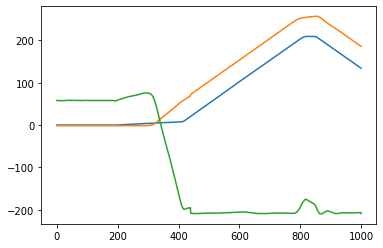

In [24]:
plt.plot(df1)
plt.plot(-df2)
plt.plot(df3)

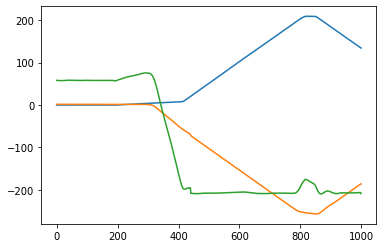

In [41]:
plt.plot(df1)
plt.plot(df2)
plt.plot(df3)

In [25]:
shift = np.argmax(signal.correlate(df1, -df2)) - len(df2)

In [26]:
print(shift)

-1


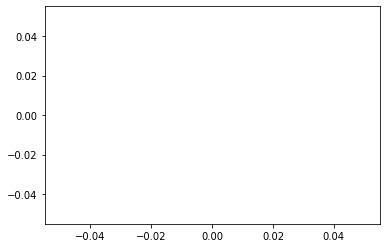

In [44]:
for target in [df1, df2]:
    dx = np.mean(np.diff(df1.values))
    shift = (np.argmax(signal.correlate(df1, target)) - len(target)-1) * dx
    plt.plot(target + shift)

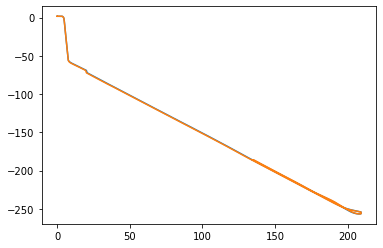

In [27]:
plt.figure()
plt.plot(df1, df2,
         df1.shift(-shift), df2)
fig = plt.gcf()

Now we're going to try using a FFT comparison

In [35]:
A = fftpack.fft(df1)
B = fftpack.fft(-df2)
Ar = -A.conjugate()
Br = -B.conjugate()
first = np.argmax(np.abs(fftpack.ifft(Ar*B)))
second = np.argmax(np.abs(fftpack.ifft(A*Br)))
print(first)
print(second)

845
845


Now we'll do it without the FFT

In [40]:
first = np.argmax(signal.correlate(df1,df2))
second = np.argmax(signal.correlate(df2,df1))
print(first)
print(second)

1687
311
